In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
nlp = spacy.load("en_core_web_sm") # Loading english large corpus
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [ ]:
import os
for dirname, _, filenames in os.walk('/content/data berlabel.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
df = pd.read_csv("/content/data berlabel.csv")

In [ ]:
df.head()

,date,id,text,username,like_count,displayname,lang,sentimen,year
0,2021-12-31 23:33:04+00:00,1477060265057214466,"Indonesia punya stok \nVaksin covid 19, 3 bula...",ahimcakep,1,ahimcakep ð®ð©,in,netral,2021
1,2021-12-31 23:28:02+00:00,1477059000378163202,Vaksinasi Covid-19 Dosis Keempat Sudah Boleh d...,haluanharian,0,Harian Haluan,in,netral,2021
2,2021-12-31 23:03:37+00:00,1477052854753906688,Dari awal covid 2020-2021-2022. Sukur kagak ke...,Tebobotee1,0,Tebobotee,in,netral,2021
3,2021-12-31 22:57:02+00:00,1477051199438286853,"2021 :\nVaksin covidâï¸\nKB3 bubar, pindah ...",nursetiandi,0,Nur Setiandi,in,netral,2021
4,2021-12-31 22:45:49+00:00,1477048376294207488,"Satu kalimat utk tahun 2021: ""Alhamdulilah mas...",FauziAdri,2,Fauzi Adrianto,in,positif,2021


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10727 entries, 0 to 10726
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         10727 non-null  object
 1   id           10727 non-null  int64 
 2   text         10727 non-null  object
 3   username     10727 non-null  object
 4   like_count   10727 non-null  int64 
 5   displayname  10722 non-null  object
 6   lang         10727 non-null  object
 7   sentimen     10727 non-null  object
 8   year         10727 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 754.4+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
        sublinear_tf=True,
        min_df=5,
        norm='l2',
        encoding='latin-1',
        ngram_range=(1, 2),
        stop_words='english'
)
features = tfidf.fit_transform(df.text).toarray()
labels = df.sentimen

print(features.shape)

(10727, 10153)


In [ ]:
df.isnull().sum() # We do not have null values

date           0
id             0
text           0
username       0
like_count     0
displayname    5
lang           0
sentimen       0
year           0
dtype: int64

EDA

In [ ]:
df_counts = df["sentimen"].value_counts().reset_index()
df_counts.head()

,index,sentimen
0,positif,4576
1,netral,4354
2,negatif,1797


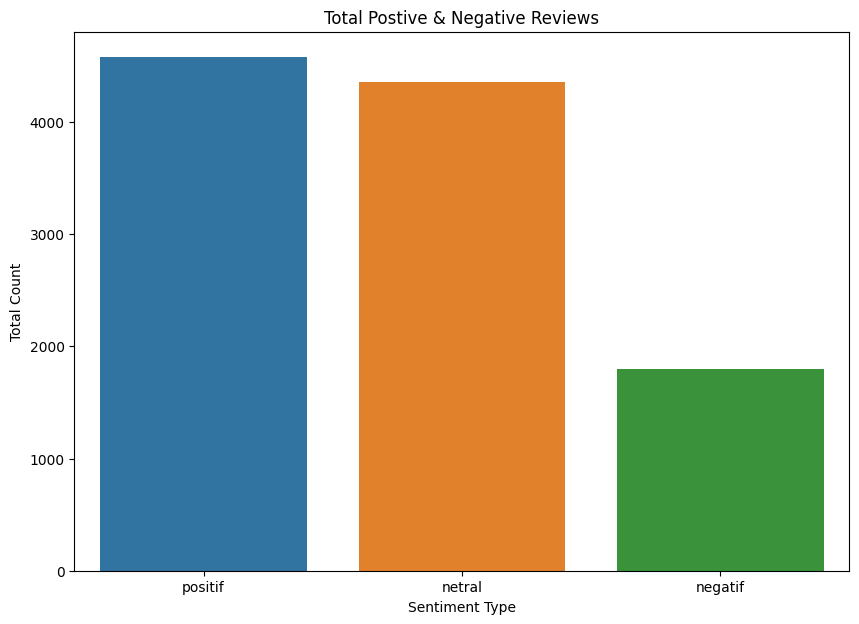

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df_counts, x='index', y='sentimen')
plt.xlabel("Sentiment Type");
plt.ylabel("Total Count");
plt.title("Total Postive & Negative Reviews");

In [ ]:
# There may be a case where reviews are not null but empty/blank. Lets check for that
#for i, lb, rv in df_raw.itertuples()[0:10]:
#    print(i, lb, rv)

In [ ]:
empty_review_index = []
for i, date, id, text, username, like_count, displayname, lang, sentimen, year in df_raw.itertuples():
    # if review type is string
    if type(text) == str:
        #if review is empty space
        if text.isspace():
            # Appent its index to the list
            empty_review_index.append(i)

In [ ]:
empty_review_index # So we do not have any empty review

[]

Positive, Negative, Neutral Token Count & Frequency Distribution

In [ ]:
import re # for regular expression

In [ ]:
pos_token = [] # to save positif tokens
neg_token = [] # to save negatif tokens
net_token = [] # to save netral tokens
corpus=[]
noun = []
def process_reviews(df):
    for i, date, id, text, username, like_count, displayname, lang, sentimen, year in df.itertuples():
        if type(text) == str:
            text = re.sub('[^a-zA-Z]', ' ', text)
            text = text.lower()
            doc = nlp(text)
            temp = []
            for token in doc:
                if not token.text.isspace():
                    if not token.is_stop and len(token.text) > 2:
                        if token.pos_ == 'NOUN':
                          noun.append(token.text)
                        if sentimen == 'positif':
                            pos_token.append(token.text)
                        elif sentimen == 'negatif':
                            neg_token.append(token.text)
                        else :
                            net_token.append(token.text)
                        temp.append(token.lemma_)
                        corpus.append(' '.join(temp))

In [ ]:
process_reviews(df)

In [ ]:
# all the positive token list
pos_token[0:10]

['satu',
 'kalimat',
 'utk',
 'tahun',
 'alhamdulilah',
 'masih',
 'beri',
 'kesehatan',
 'seluruh',
 'keluarga']

In [ ]:
# all the negative token list
neg_token[0:10]

['harga',
 'mobil',
 'itu',
 'sebanding',
 'tidak',
 'dengan',
 'orang',
 'orang',
 'yang',
 'saat']

In [ ]:
# all the netral token list
net_token[0:10]

['indonesia',
 'punya',
 'stok',
 'vaksin',
 'covid',
 'bulan',
 'kedepan',
 'presiden',
 'joko',
 'widodo']

In [ ]:
from nltk import FreqDist

In [ ]:
# preparing frequency distribution variables
freq_pos = FreqDist(pos_token)
freq_neg = FreqDist(neg_token)
freq_net = FreqDist(net_token)

In [ ]:
freq_pos

FreqDist({'vaksin': 5886, 'covid': 5279, 'https': 3341, 'dan': 1780, 'yang': 1308, 'untuk': 1144, 'ini': 891, 'anak': 834, 'dari': 711, 'vaksinasi': 707, ...})

In [ ]:
freq_neg

FreqDist({'vaksin': 2340, 'covid': 2169, 'https': 1244, 'anak': 562, 'dan': 526, 'untuk': 523, 'yang': 450, 'tahun': 402, 'vaksinasi': 358, 'ini': 298, ...})

In [ ]:
freq_net

FreqDist({'vaksin': 5129, 'covid': 4828, 'https': 3948, 'dan': 952, 'untuk': 815, 'yang': 768, 'vaksinasi': 677, 'anak': 654, 'omicron': 587, 'ini': 498, ...})

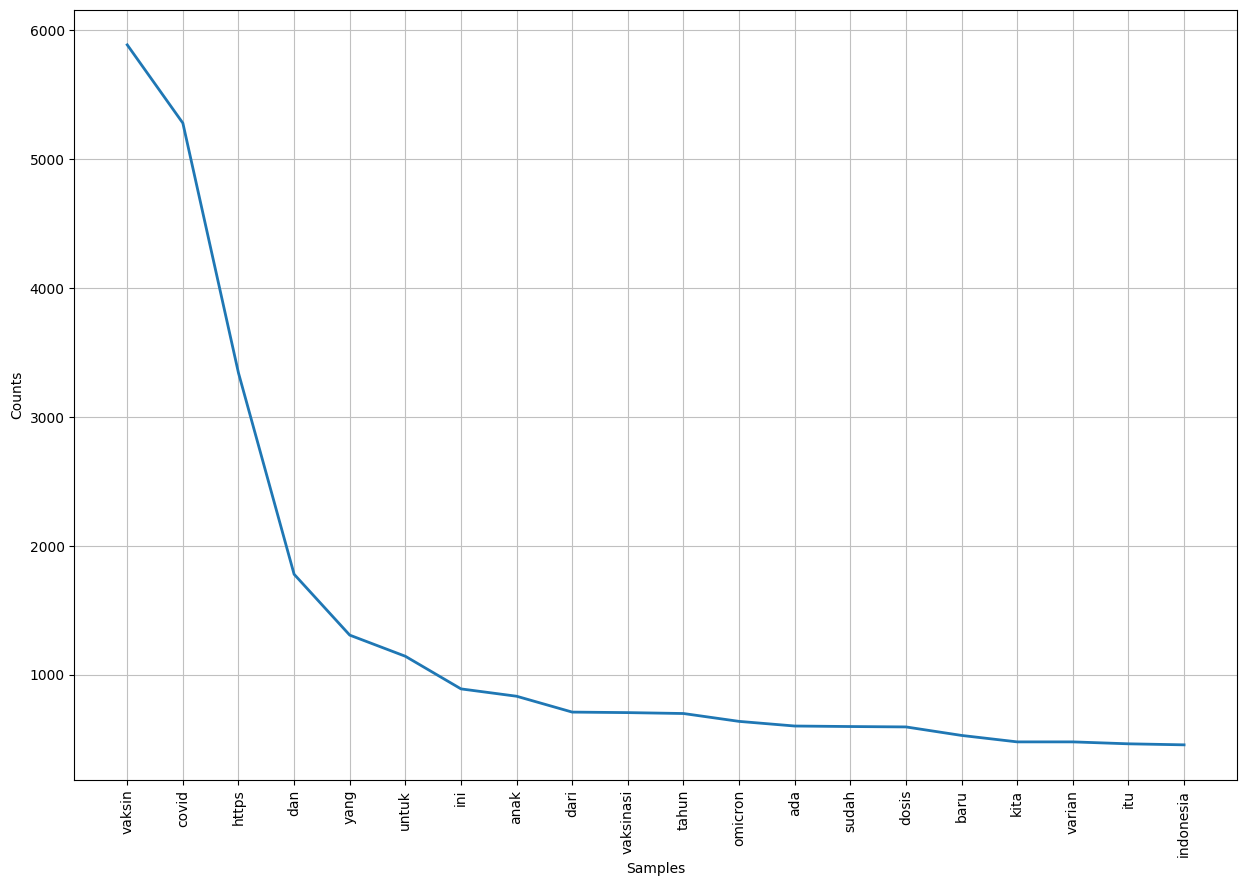

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Top 20 most repeated words in positive comments
plt.figure(figsize=(15, 10))
freq_pos.plot(20)

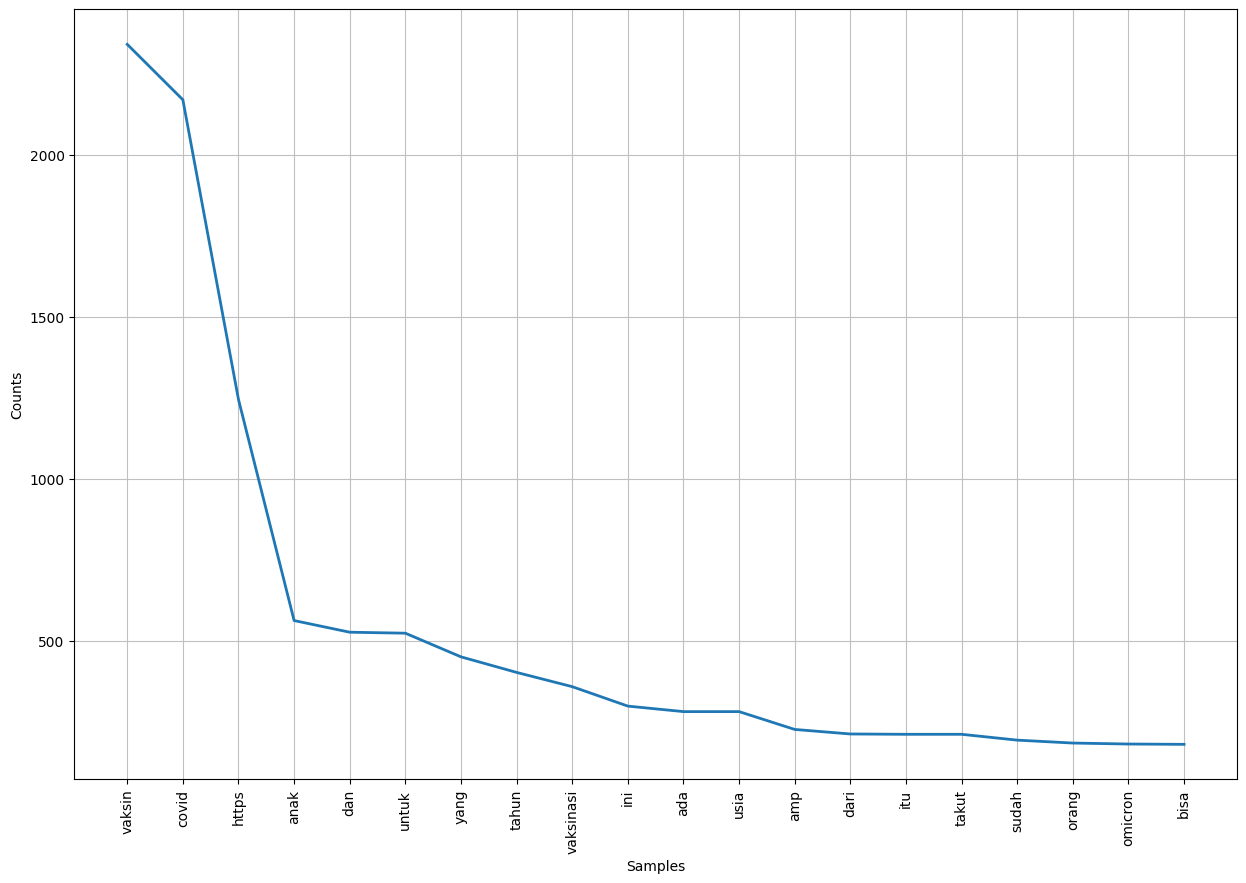

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# top 20 most repeated words in negative comments
plt.figure(figsize=(15, 10))
freq_neg.plot(20)

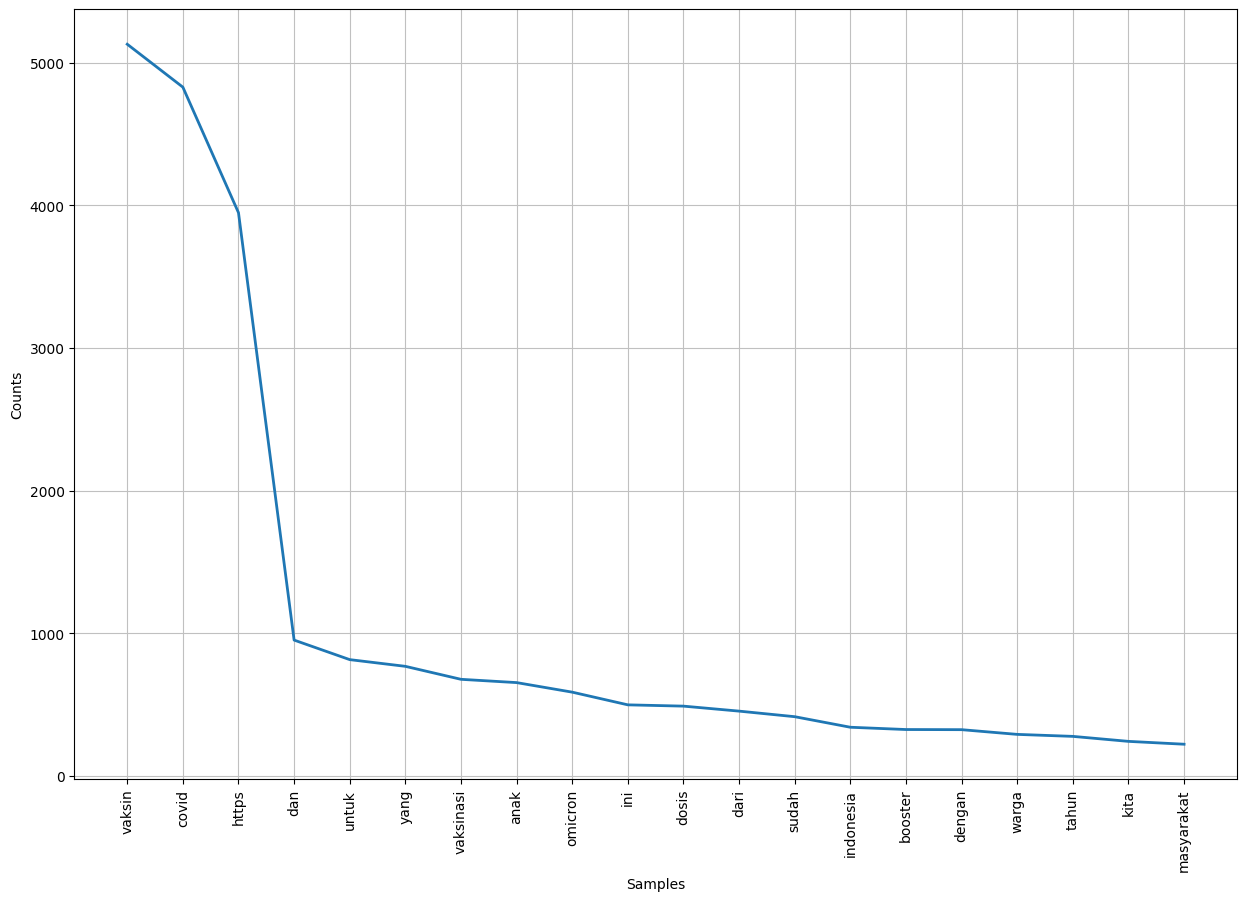

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# top 20 most repeated words in netral comments
plt.figure(figsize=(15, 10))
freq_net.plot(20)

In [ ]:
# All the nouns used in our reviews. It will give you an idea like what are the famous keywords?
noun[0:10]

['vaksin',
 'kvmyzujcug',
 'dosis',
 'sukur',
 'padahal',
 'vaksin',
 'doorprize',
 'https',
 'selama',
 'bulan']

Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

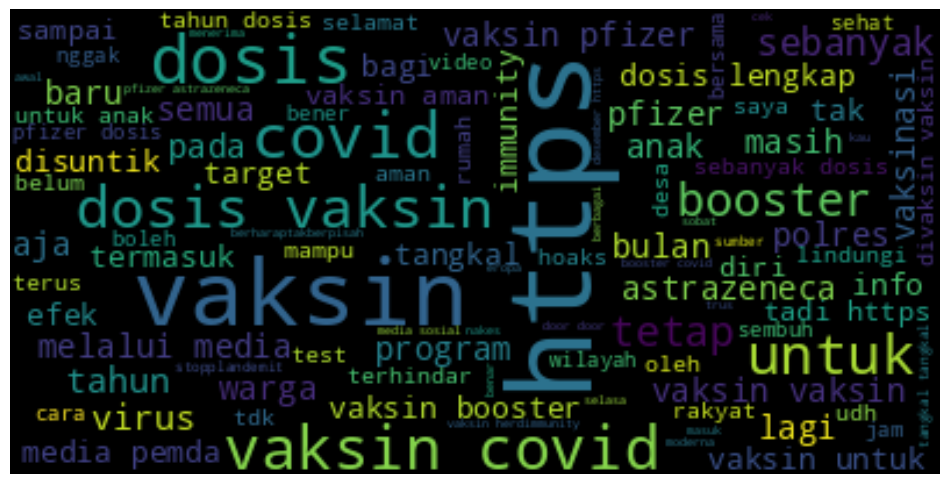

In [ ]:
# Most famous nouns used in Tweet Bapak Jokowi

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(' '.join(noun))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()